In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

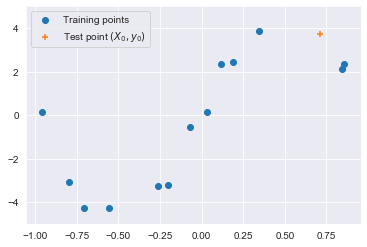

In [34]:




def f(x, sigma=.5):
    if isinstance(x, float):
        return 5*np.sin(np.pi*x) + np.random.normal(scale=sigma)
    else:
        return 5*np.sin(np.pi*x) + np.random.normal(scale=sigma, size=len(x))

def get_coeffs(X, y):
    return inv(X.T@X)@X.T@y

def get_poly_matrix(x, p=2):
    n = len(x)
    X = np.ones(n).reshape(n,1)
    for k in np.arange(1,p+1):
        x_k = (x**k).reshape(n,1)
        X = np.hstack((X, x_k))
    return X

n = 15
x = np.random.uniform(-1,1,size=n)
t = np.arange(-10,10,.01)
y = f(x)

x0 = np.random.uniform(-1,1)
y0 = f(x0)






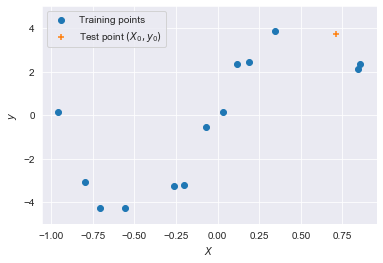

In [35]:

plt.ylim(-5,5)
plt.scatter(x, y, label=r'Training points')
plt.scatter(x0,y0, marker='+', label=r'Test point $(X_0,y_0)$')
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
plt.legend()
plt.savefig('../img/post1_example1_fig1.png')
plt.show()

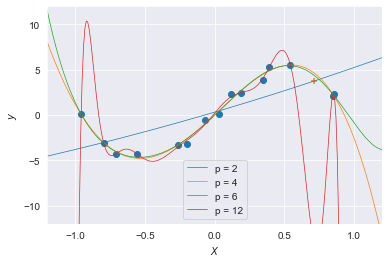

In [58]:
for p in [2, 4, 6, 12]:
    X = get_poly_matrix(x, p=p)
    beta = get_coeffs(X,y)
    T = get_poly_matrix(t, p=p)
    plt.plot(t, T@beta, label='p = %s' % (p), linewidth=.7)

plt.ylim(-12,12)
plt.xlim(-1.2,1.2)
plt.scatter(x, y)
plt.scatter(x0,y0, marker='+')
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
plt.legend()
plt.savefig('../img/post1_example1_fig3.png')
plt.show()